<a href="https://colab.research.google.com/github/Ghost0734/Sales-Dataset/blob/main/Sales_Dataset_Case_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import files
uploaded = files.upload()

Saving advertising_sales_data.xlsx to advertising_sales_data (1).xlsx


In [ ]:
import pandas as pd

df = pd.read_excel('advertising_sales_data.xlsx', sheet_name='advertising_sales_data')

average_tv = df['TV'].mean()
print(f"{average_tv:.2f}")

In [ ]:
import pandas as pd

df = pd.read_excel('advertising_sales_data.xlsx', sheet_name='advertising_sales_data')

correlation = df['Radio'].corr(df['Sales'])
print(f"{correlation:.4f}")

In [11]:
import pandas as pd

df = pd.read_excel('advertising_sales_data.xlsx', sheet_name='advertising_sales_data')

correlations = df[['TV', 'Radio', 'Newspaper', 'Sales']].corr()['Sales'].drop('Sales')

sorted_correlations = correlations.sort_values(ascending=False)
print(sorted_correlations)

TV           0.901208
Radio        0.349728
Newspaper    0.157960
Name: Sales, dtype: float64


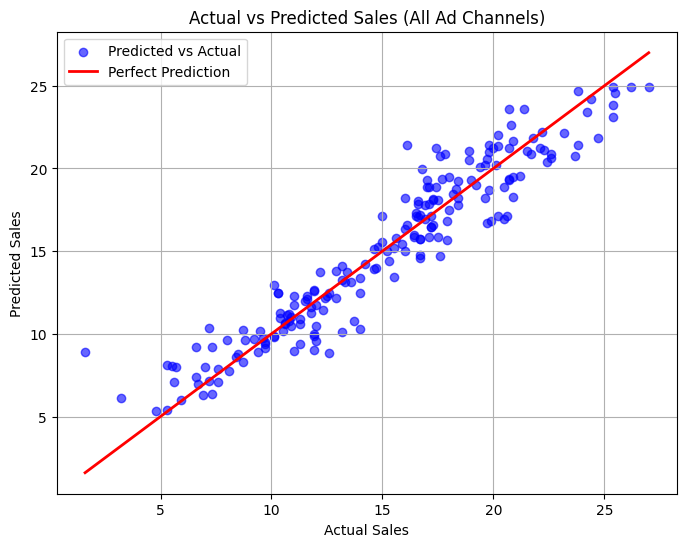

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np


df[['TV', 'Radio', 'Newspaper', 'Sales']] = df[['TV', 'Radio', 'Newspaper', 'Sales']].replace('...', np.nan)

feature_imputer = SimpleImputer(strategy='mean')
X = df[['TV', 'Radio', 'Newspaper']]
X_imputed = feature_imputer.fit_transform(X)

target_imputer = SimpleImputer(strategy='mean')
y = df['Sales']
y_imputed = target_imputer.fit_transform(y.values.reshape(-1, 1))


model = LinearRegression()
model.fit(X_imputed, y_imputed)
y_pred = model.predict(X_imputed)

plt.figure(figsize=(8, 6))
plt.scatter(y_imputed, y_pred, alpha=0.6, label='Predicted vs Actual', color='blue')
plt.plot([y_imputed.min(), y_imputed.max()], [y_imputed.min(), y_imputed.max()], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (All Ad Channels)')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import zipfile
import io

# Assuming the uploaded file is MLResearch.zip
zip_file_name = 'MLResearch.zip'

if zip_file_name in uploaded:
    with zipfile.ZipFile(io.BytesIO(uploaded[zip_file_name]), 'r') as z:
        z.extractall()
    print(f"'{zip_file_name}' extracted successfully.")
else:
    print(f"Error: '{zip_file_name}' not found in uploaded files.")


'MLResearch.zip' extracted successfully.


In [13]:
import numpy as np


new_expenditure = np.array([[200, 40, 50]])

new_expenditure_imputed = feature_imputer.transform(new_expenditure)

predicted_sales = model.predict(new_expenditure_imputed)
print(f"Predicted Sales: {predicted_sales[0][0]:.2f}")

Predicted Sales: 19.81


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_imputed)

model = LinearRegression()
model.fit(X_normalized, y_imputed)
y_pred = model.predict(X_normalized)

mse = mean_squared_error(y_imputed, y_pred)
r2 = r2_score(y_imputed, y_pred)
print(f"Mean Squared Error (Normalized): {mse:.2f}")
print(f"R^2 Score (Normalized): {r2:.2f}")

Mean Squared Error (Normalized): 2.71
R^2 Score (Normalized): 0.90


In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score


X = df[['Radio', 'Newspaper']]
y = df['Sales']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1))

model = LinearRegression()
model.fit(X_imputed, y_imputed)
y_pred = model.predict(X_imputed)

mse = mean_squared_error(y_imputed, y_pred)
r2 = r2_score(y_imputed, y_pred)
print(f"Mean Squared Error (Radio & Newspaper): {mse:.2f}")
print(f"R^2 Score (Radio & Newspaper): {r2:.2f}")

Mean Squared Error (Radio & Newspaper): 24.35
R^2 Score (Radio & Newspaper): 0.12
